Sample images for letter A
(200, 200, 3)


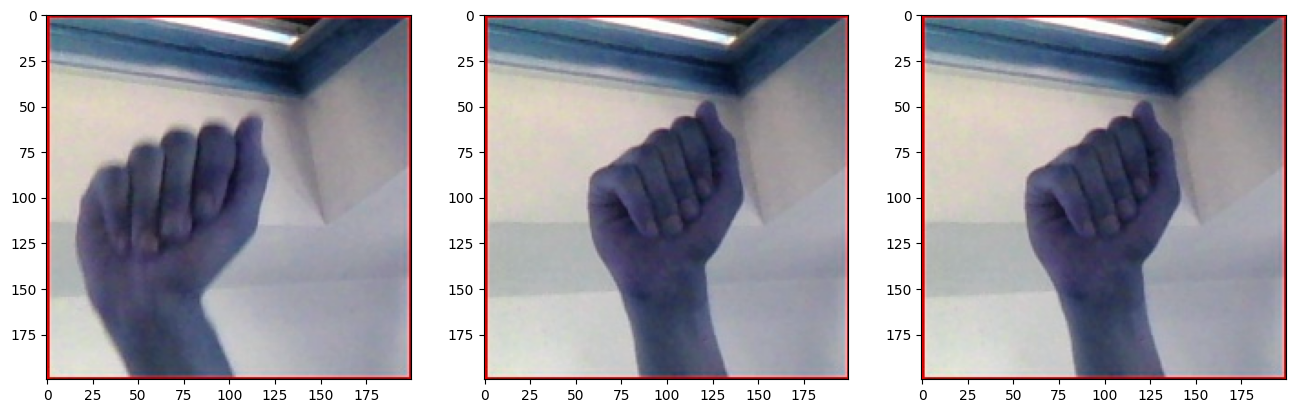

In [2]:
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# Đảm bảo giữa các lần chạy là giống nhau 
import numpy as np 
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(2)

# Import to view data

import cv2
from glob import glob 
from matplotlib import pyplot as plt
import random

def plot_three_sample(letter):
    print("Sample images for letter " + letter)
    
    # Get 3 path directory to image   
    path = './dataset/ASL_alphabet/asl_alphabet_train/asl_alphabet_train/'
    image_path = path + letter + '/**'
    path_contents = glob(image_path)
    imgs = random.sample(path_contents, 3)

    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[1]))
    print(cv2.imread(imgs[1]).shape)

plot_three_sample('A')

In [3]:
print('In ra dữ liệu ảnh dưới dạng ma trận')
letter = 'A'
path = './dataset//ASL_alphabet/asl_alphabet_train/asl_alphabet_train/'
image_path = path + letter + '/**'
path_contents = glob(image_path)
imgs = random.sample(path_contents, 3)
print(cv2.imread(imgs[1]).shape)

In ra dữ liệu ảnh dưới dạng ma trận
(200, 200, 3)


# Tiền xử lí dữ liệu

In [125]:
data_dir = './dataset/ASL_alphabet/asl_alphabet_train/asl_alphabet_train/'

target_size = (64,64)
target_dim = (64,64,3)

n_classes = 29
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(rescale=1./255,
                                    samplewise_center=True,
                                    samplewise_std_normalization=True,
                                    validation_split=val_frac)
train_generator = data_augmentor.flow_from_directory(data_dir,target_size=target_size,batch_size=batch_size,shuffle=True,subset='training')
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [61]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [37]:
train_generator.next()[0]

array([[[[-3.136644  , -3.0563757 ,  1.5991796 ],
         [-2.8958392 , -2.9761074 ,  0.49549192],
         [-2.9159064 , -2.9159064 ,  0.5757601 ],
         ...,
         [-2.815571  , -3.0363085 ,  0.7362965 ],
         [-2.9159064 , -3.0162416 ,  0.59582716],
         [-2.9761074 , -3.0563757 ,  1.1777716 ]],

        [[-2.815571  , -2.9761074 ,  0.67609537],
         [-0.5881287 , -0.8891344 , -1.3105425 ],
         [-0.5881287 , -0.6884639 , -1.2704084 ],
         ...,
         [-1.3506765 , -1.7118834 , -2.1132243 ],
         [-0.5881287 , -0.78879917, -1.0296037 ],
         [-0.80886626, -0.8690674 ,  0.7563635 ]],

        [[-2.9560404 , -3.0162416 ,  0.535626  ],
         [-1.0296037 , -1.1901401 , -1.9326209 ],
         [-1.3908106 , -1.551347  , -1.9326209 ],
         ...,
         [-0.5078605 , -0.64832985, -0.9694026 ],
         [-0.6884639 , -0.64832985, -0.8690674 ],
         [-0.8690674 , -0.84900033,  0.95703405]],

        ...,

        [[-2.9761074 , -2.8557053 ,  0

# Xây dựng model

In [4]:
## 
model = Sequential([
    Conv2D(64,kernel_size=4,strides=1,activation='relu',input_shape=target_dim),
    Conv2D(64, kernel_size=4, strides=2, activation='relu'),
    Dropout(0.5),
    Conv2D(128, kernel_size=4, strides=1, activation='relu'),
    Conv2D(128, kernel_size=4, strides=2, activation='relu'),
    Dropout(0.5),
    Conv2D(256, kernel_size=4, strides=1, activation='relu'),
    Conv2D(256, kernel_size=4, strides=2, activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])


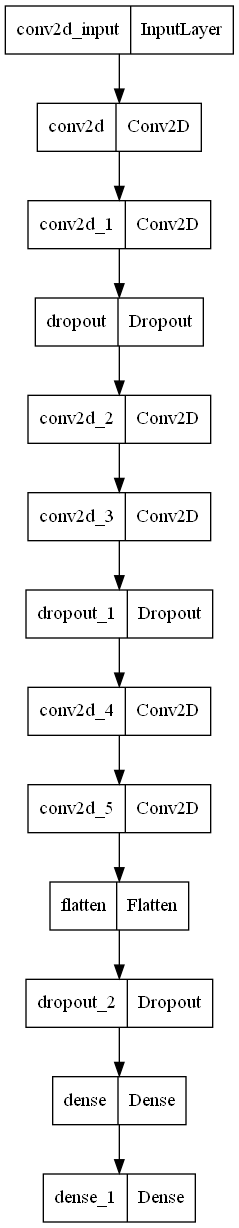

In [5]:
from keras.utils import plot_model
plot_model(model,to_file='./img/model.png')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 64)        3136      
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        65600     
                                                                 
 dropout (Dropout)           (None, 29, 29, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       131200    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       262272    
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 256)         5

# Huấn luyện mô hình

In [7]:
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5
1224/1224 [==============================] - 2259s 2s/step - loss: 1.1672 - accuracy: 0.6303 - val_loss: 0.6796 - val_accuracy: 0.7661
Epoch 2/5
1224/1224 [==============================] - 2031s 2s/step - loss: 0.2560 - accuracy: 0.9140 - val_loss: 0.5393 - val_accuracy: 0.8426
Epoch 3/5
1224/1224 [==============================] - 1715s 1s/step - loss: 0.1682 - accuracy: 0.9438 - val_loss: 0.4294 - val_accuracy: 0.8654
Epoch 4/5
1224/1224 [==============================] - 1699s 1s/step - loss: 0.1296 - accuracy: 0.9569 - val_loss: 0.4697 - val_accuracy: 0.8672
Epoch 5/5
1224/1224 [==============================] - 3752s 3s/step - loss: 0.1144 - accuracy: 0.9641 - val_loss: 0.4299 - val_accuracy: 0.8789


# Lưu mô hình

In [8]:
model.save('model.h5')

# Load model

In [74]:
from keras.models import load_model
model = load_model('./store_model/model.h5')

# Make predict a single image

In [117]:
import numpy as np

def load(filename):
    # Load a single image
    image = cv2.imread(filename)
    image = image.astype('float32')
    image = cv2.resize(image, (64,64))
    plt.imshow(image/255.0)
    # Apply samplewise_center
    mean = np.mean(image, axis=(0,1), keepdims=True)
    image -= mean

    # Apply samplewise_std_normalization
    std = np.std(image, axis=(0,1), keepdims=True)
    image /= std

    # Reshape the image to be (1, height, width, channels)
    image = np.expand_dims(image, axis=0)
    print(f"Load successful image has shape {image.shape}")
    return image

def predict_a_image(filename):

    image = load(filename)
    results = model.predict(image)
    
    # Get index of max element
    index = np.argmax(results)

    # Get the key corresponding to index
    key = [k for k, v in train_generator.class_indices.items() if v == index][0]
    print(f'Predict image belong to {key}')
    

Load successful image has shape (1, 64, 64, 3)
1/1 [==============================] - 0s 37ms/step
Predict image belong to D


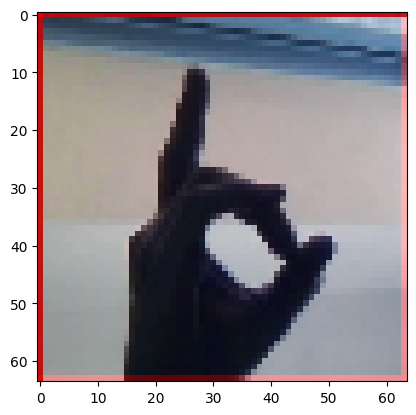

In [124]:
# path = './image_test/A_test.jpg'
path = './dataset/ASL_alphabet/asl_alphabet_test/asl_alphabet_test/D_test.jpg'
predict_a_image(path)